In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries


In [ ]:
%matplotlib inline

import os
import shutil
import random
import torch
import torchvision
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import argparse
import time
import json
import re

from PIL import Image
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,  f1_score, recall_score, classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau

torch.manual_seed(0)

print('Using PyTorch version', torch.__version__)

Using PyTorch version 1.9.0+cu102


In [ ]:
def plot_history(history):
  plt.rcParams['figure.figsize'] = (6,6)
  acc = history['acc']
  val_acc = history['val_acc']
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, 'red', label='Training acc')
  plt.plot(epochs, val_acc, 'blue', label='Validation acc')
  plt.legend()
  plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, 'red', label='Training loss')
  plt.plot(epochs, val_loss, 'blue', label='Validation loss')
  plt.legend()
  plt.show()

# Model Evaluations

## Resnet18 - Run 3 

- Resnet18 pretrained model was loaded 
- Layers in model were frozen to keep weights intact, preventing backward weight propogation
- Initial Learning Rate of 0.01
- Learning Rate Scheduler was used at a factor of 0.1 with patience 3

Training time: 158.785 minutes

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-3/resnethistory.csv')

In [ ]:
history

,loss,val_loss,acc,val_acc
0,0.037192,0.304458,0.770566,0.900606
1,0.000962,0.764017,0.827389,0.818182
2,1.316087,0.355238,0.825250,0.904242
3,0.112720,0.331234,0.840466,0.911515
4,0.005045,0.858920,0.832858,0.856970
5,0.257224,1.080344,0.836900,0.841212
6,0.409737,0.330818,0.843557,0.940606
7,0.257677,0.356574,0.886115,0.926061
8,0.000578,0.271120,0.890870,0.938182
9,2.971229,0.332586,0.886353,0.930909


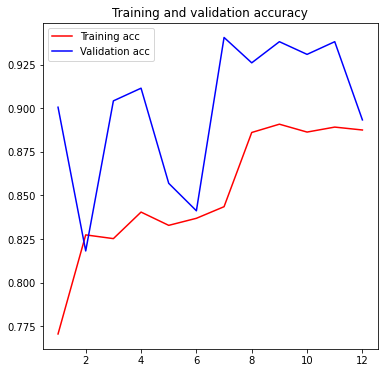

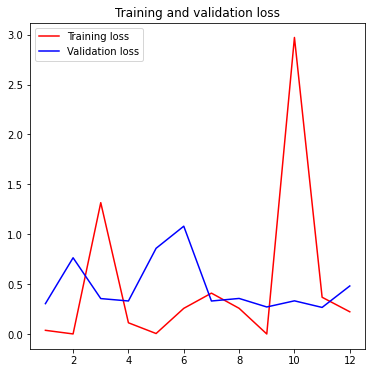

In [ ]:
plot_history(history)

Learning rate was adjusted from from 0.01 to 0.001 at epoch 8. From the train and validation accuracy graph we can see that this has resulted in a spike in accuracy.

Best score here is Epoch 12, with learning rate of 0.001, with an accuracy of 0.89 and validation loss of 0.481.

## Resnet18 - Run 4

- Resnet18 pretrained model was loaded 
- Layers in model were frozen to keep weights intact, preventing backward weight propogation
- Initial Learning Rate of 0.001
- Learning Rate Scheduler was used at a factor of 0.1 with patience 3

Training time: 183.703 minutes

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-4/resnethistory.csv')

In [ ]:
history

,loss,val_loss,acc,val_acc
0,0.722385,0.289043,0.787684,0.906667
1,0.274805,0.209396,0.849263,0.918788
2,0.469042,0.222649,0.855920,0.922424
3,0.109666,0.219491,0.864479,0.923636
4,0.054266,0.209229,0.872087,0.920000
5,0.073335,0.205012,0.864004,0.917576
6,0.448047,0.225928,0.869710,0.903030
7,0.056780,0.174338,0.871374,0.935758
8,0.021616,0.180574,0.882073,0.940606
9,1.090892,0.152976,0.882549,0.946667


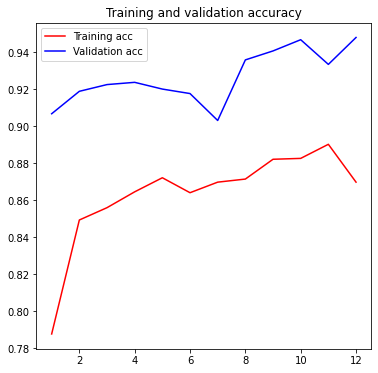

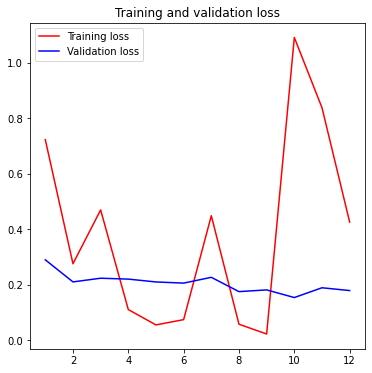

In [ ]:
plot_history(history)

Learning rate was not adjusted and kept at 0.001 throughout.
Best score here is Epoch 11, with learning rate of 0.001, with an accuracy of 93.3% and validation loss of 0.188303.

## Resnet18 - Run 5

- Resnet18 pretrained model was loaded
- Layers in model were not frozen, allowing fine-tuning and backward weight propogation
- Initial Learning Rate of 0.001
- Learning Rate Scheduler was used at a factor of 0.1 with patience 3

Training time: 379.154 minutes

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-5/resnethistory.csv')

In [ ]:
history

,loss,val_loss,acc,val_acc
0,0.386446,0.283260,0.845221,0.896970
1,0.118190,0.294088,0.904184,0.882424
2,0.064098,0.197946,0.913695,0.935758
3,0.060318,0.266108,0.934617,0.913939
4,0.104654,0.141490,0.939848,0.943030
5,0.093726,0.167705,0.946743,0.941818
6,0.005431,0.132650,0.962435,0.961212
7,0.009352,0.217514,0.967190,0.924848
8,0.265225,0.148728,0.957442,0.953939
9,0.018197,0.207212,0.970043,0.927273


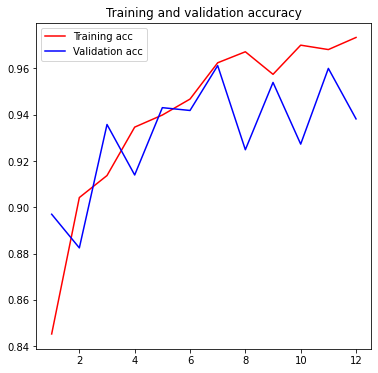

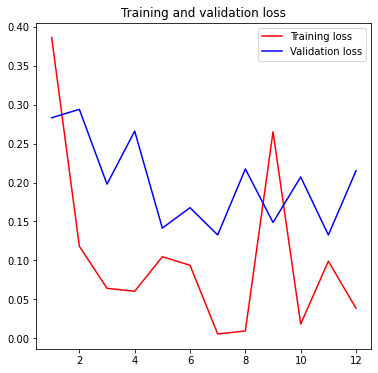

In [ ]:
plot_history(history)

Learning rate was not adjusted and kept at 0.001 throughout. Best score here is Epoch 7, with learning rate of 0.001, with an accuracy of 96.1% and validation loss of 0.132659.


## Resnet18 - Run 6

- Resnet18 pretrained model was loaded
- Layers in model were not frozen, allowing fine-tuning and backward weight propogation
- Initial Learning Rate of 3e-4
- Learning Rate Scheduler was used at a factor of 0.1 with patience 3

Training time: 201.908 minutes

In [ ]:
history = pd.read_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-6/resnethistory.csv')

In [ ]:
history

,loss,val_loss,acc,val_acc
0,0.028105,0.100063,0.894437,0.969697
1,0.550063,0.117313,0.947932,0.951515
2,0.035652,0.103258,0.958393,0.962424
3,0.034640,0.109289,0.963623,0.960000
4,0.009833,0.097756,0.969092,0.967273
5,0.008826,0.109665,0.976462,0.957576
6,0.053172,0.098234,0.970043,0.966061
7,0.002376,0.072983,0.982644,0.975758
8,0.001462,0.105614,0.976700,0.962424
9,0.151462,0.129236,0.982644,0.958788


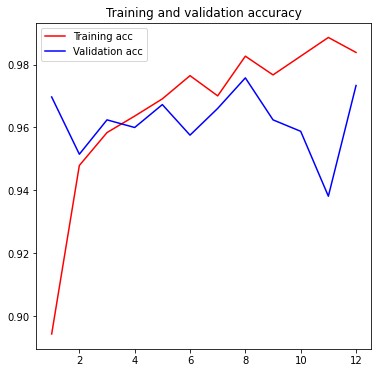

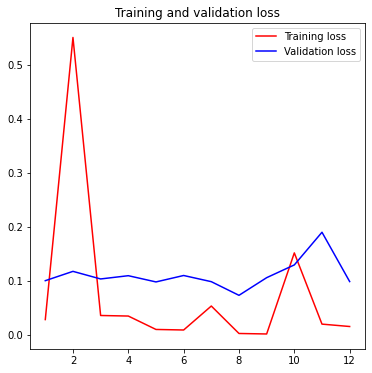

In [ ]:
plot_history(history)

Learning rate was not adjusted and kept at 3e-4 throughout. Best score here is Epoch 8, with learning rate of 3e-4, accuracy of 98.3% and validation loss of 0.072983.

In [ ]:
predictions = pd.read_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-6/resnet18_epoch8.csv').drop('Unnamed: 0', axis=1)

In [ ]:
predictions.dtypes

image            object
targets           int64
predictions       int64
probabilities    object
dtype: object

In [ ]:
predictions

,image,targets,predictions,probabilities
0,person596_bacteria_2446.jpeg,1,1,"tensor([-0.3107, 4.2587, -7.0566])"
1,person1193_virus_2034.jpeg,1,1,"tensor([-1.6780, 5.4973, -7.4267])"
2,person1420_bacteria_3647.jpeg,1,1,"tensor([-0.9699, 2.4874, -3.5649])"
3,DX.1.2.840.113564.1722810162.20200325035519587...,2,2,"tensor([-0.9210, -2.2196, 3.1523])"
4,person1275_bacteria_3237.jpeg,1,1,"tensor([-3.3225, 6.4683, -6.3629])"
...,...,...,...,...
820,person543_virus_1073.jpeg,1,1,"tensor([-0.9742, 5.5230, -8.3965])"
821,person311_bacteria_1452.jpeg,1,1,"tensor([-2.5152, 4.3343, -5.0387])"
822,person338_bacteria_1568.jpeg,1,1,"tensor([ -6.7789, 12.1454, -10.5454])"
823,person281_bacteria_1325.jpeg,1,1,"tensor([ -3.5439, 9.8992, -11.7145])"


# Best Model: Misclassifications Analysis

Misclassifications can be attributed to the following: 

1.   High contrast images  
When faced with high contrast images that has subtle findings, the model will classify the image as normal.
2.   Poorly taken X-Rays  
Not all of the X-Rays in the dataset are of good quality. The definition of good quality in terms of radiologists is that it has to be [RIPE](https://geekymedics.com/chest-x-ray-interpretation-a-methodical-approach/) (having good Rotation, Inspiration, Projection, Exposure)
3.   Actual misclassifications  
Some images are categorized as normal but has abnormalities in them and vice versa.

4.   Highly subtle findings
Some X-Rays have only hints of abnormalities making it very difficult to differentiate. 

In [ ]:
class_names = ['normal', 'thoraxdisease', 'covid']

In [ ]:
def split_probabilities(predictions):
  normal = []
  thoraxdisease = []
  covid = []
  count = 0
  for index, output in enumerate(predictions.probabilities):
    lst = '[' + re.match(r"[^[]*\[([^]]*)\]",  output).groups()[0] + ']'
    lst = json.loads(lst)
    # convert list to tensor
    lst = torch.as_tensor(lst)
    # calculate the probabilities
    probs = torch.nn.functional.softmax(lst, dim=0)
    normal.append(round(float(probs[0]),6))
    thoraxdisease.append(round(float(probs[1]),6))
    covid.append(round(float(probs[2]),6))
  predictions['normal'] = normal
  predictions['thoraxdisease'] = thoraxdisease
  predictions['covid'] = covid
  predictions.drop('probabilities', axis=1, inplace=True)

In [ ]:
split_probabilities(predictions)

In [ ]:
misclassifications = predictions[predictions.targets != predictions.predictions]

In [ ]:
misclassifications

,image,targets,predictions,normal,thoraxdisease,covid
22,person279_virus_576.jpeg,1,0,0.987059,0.012938,0.000003
24,person33_bacteria_175.jpeg,1,0,0.547789,0.452094,0.000118
81,person1174_virus_1980.jpeg,1,0,0.797928,0.202071,0.000001
89,person1164_virus_1958.jpeg,1,0,0.923705,0.076286,0.000009
101,00000093_000.png,1,0,0.986011,0.013574,0.000415
106,00000132_005.png,1,0,0.969643,0.030275,0.000082
139,person425_virus_871.jpeg,1,2,0.162856,0.314778,0.522366
160,person422_bacteria_1853.jpeg,1,0,0.712584,0.287033,0.000382
256,person1088_virus_1800.jpeg,1,0,0.565232,0.093750,0.341018
344,person498_bacteria_2101.jpeg,1,0,0.701032,0.298943,0.000025


In [ ]:
# misclassified_targets= list(misclassifications.targets)
# misclassified_images= list(misclassifications.image)

# for i, img in enumerate(misclassified_images):
#   target = class_names[misclassified_targets[i]]
#   file_name = img
#   img = Image.open('/content/drive/MyDrive/Capstone/Dataset/test/'+ target + '/' + file_name)
#   img.thumbnail((300, 300))
#   img.save('/content/drive/MyDrive/Capstone/Models/Resnet18-6/misclassifications/'+ target + '/' +file_name)

# Best Model: Metrics Evaluation

In [ ]:
y_true = predictions.targets
y_pred = predictions.predictions
cf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.99052133 0.00947867 0.        ]
 [0.02857143 0.96964286 0.00178571]
 [0.01851852 0.         0.98148148]]


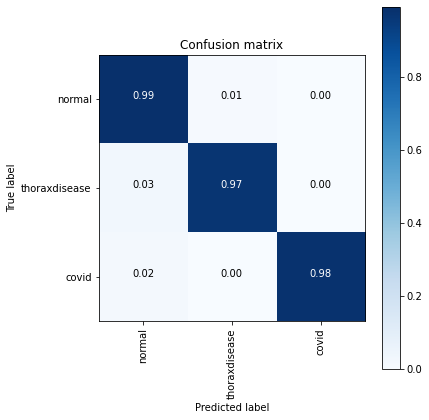

In [ ]:
plot_confusion_matrix(cf_matrix, class_names,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       211
           1       1.00      0.97      0.98       560
           2       0.98      0.98      0.98        54

    accuracy                           0.98       825
   macro avg       0.97      0.98      0.97       825
weighted avg       0.98      0.98      0.98       825



Our model achieved a higher sensitivity score than the industry average of 84%. It has also performed pretty well to unseen data, giving a kaggle score of 90.4%. 

## Retrain Model

Retraining the model with the entire dataset did not improve the kaggle score, in fact it resulted in higher overfitting. 

In [ ]:
# creating a custom dataset in pytorch
class ChestXRayDataset(torch.utils.data.Dataset):
     # instantiating a dataset object
    def __init__(self, image_dirs, transform):
      def get_images(class_name):
        # list of images from chosen folder
        images = os.listdir(image_dirs[class_name]) 
        # print out no. of images found for respective class
        print(f'Found {len(images)} {class_name} examples')
        # get list of images for the said class
        return images
    
      self.images = []
      self.labels = []
      #instantiate a list of classes
      self.class_names = ['normal','thoraxdisease', 'covid']

      for class_name in self.class_names:
        images = get_images(class_name)
        # list containing all the images
        self.images.extend(images)
        # list containing all the corresponding image labels
        self.labels.extend([class_name]*len(images))

      # initialize directory containing images    
      self.image_dirs = image_dirs
      # set transformers for images
      self.transform = transform
         
    # function that returns no. of samples in dataset
    def __len__(self):
        # count total image
        return len(self.images)
    
    # function loads and returns a sample from the dataset at the given index 
    def __getitem__(self, index):
        # image at index position of all the images
        image_name = self.images[index]
        # Its label 
        class_name = self.labels[index]
        image_path = os.path.join(self.image_dirs[class_name], image_name)
        #convert to RGB as model input needs to be RGB
        image = Image.open(image_path).convert('RGB')
        return image_name,self.transform(image), self.class_names.index(class_name)

In [ ]:
#transforms and augments images for train dataset
train_transform = torchvision.transforms.Compose([
    # standardize size of images to expected input by Resnet18                                             
    torchvision.transforms.Resize(size=(224, 224)),
    # each epoch will have probability original/horizontally flipped of 0.5 (increase variation)
    torchvision.transforms.RandomHorizontalFlip(),
    # change numpy array to tensor because pytorch uses tensor as input
    torchvision.transforms.ToTensor(),
    # normalize transformation to match Imagenet normalization for Resnet18 
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#transforms and augments images for train dataset

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size=(224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
#create a custom dataset for training images
train_dirs = {
    'normal': '/content/drive/MyDrive/Capstone/Dataset/combined/normal/',
    'thoraxdisease': '/content/drive/MyDrive/Capstone/Dataset/combined/thoraxdisease/',
    'covid': '/content/drive/MyDrive/Capstone/Dataset/combined/covid/',
}

train_dataset = ChestXRayDataset(train_dirs, train_transform)

Found 1408 normal examples
Found 3736 thoraxdisease examples
Found 363 covid examples


In [ ]:
class ChestXRayValDataset(torch.utils.data.Dataset):
     # instantiating a dataset object
    def __init__(self, dataset, image_dirs, transform):
        #instantiate image dictionary
        self.images = dataset
        # initialize directory containing images    
        self.image_dirs = image_dirs
        # set transformers for images
        self.transform = transform
         
    # function that returns no. of samples in dataset
    def __len__(self):
        # count total image in each class and sum it all together
        return len(self.images)
    
    # function loads and returns a sample from the dataset at the given index 
    def __getitem__(self, index):
        index = index % len(self.images)
        image_name = self.images[index]
        image_path = os.path.join(self.image_dirs, image_name)
        image = Image.open(image_path).convert('RGB')
        return image_name,self.transform(image)

def get_images(root_dir, class_name):
    #create list of images from chosen folder
    images = [x for x in os.listdir(os.path.join(root_dir, class_name))]
    # print out no. of images found for respective class
    print(f'Found {len(images)} {class_name} examples')
    # get list of images for the said class
    return images

In [ ]:
#create a custom dataset for validation images
val_dir = '/content/drive/MyDrive/Capstone/Validation/'
val_dataset = {}
print('Validation Dataset')
val_dataset = get_images(val_dir,'')
val_dataset = ChestXRayValDataset(val_dataset, val_dir, test_transform)

Validation Dataset
Found 1130  examples


In [ ]:
batch_size = 6
# create an iterable dataset of batch size 6 
dl_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dl_val = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# check number of batches is dataloader
print('Number of training batches', len(dl_train))
print('Number of test batches', len(dl_val))

Number of training batches 918
Number of test batches 189


#### Load Best Performing Model

In [ ]:
resnet18 = torchvision.models.resnet18()
#change output features from pretrain 1000 to 3 as we only have 3 classes
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)

resnet18.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/Models/Resnet18-6/resnet18_epoch8.pth'))

In [ ]:
#set learning rate as 3e-4
lr = 3e-4
#Declare criterion
loss_fn = torch.nn.CrossEntropyLoss()
#Declare adam optimizer with a learning rate of lr
optimizer = torch.optim.Adam(resnet18.parameters(), lr=lr)


## Train Model on Entire Training Dataset

In [ ]:
# --- TRAIN ON TRAINING SET -----------------------------

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    train_loss         = 0.0
    num_train_correct  = 0
    num_train_examples = 0
    
    for batch, (name, image, labels) in enumerate(dataloader):
        # Compute prediction error
        pred = model(image)
        loss = loss_fn(pred, labels)
        
        # Backpropagation
        # Clear the gradients
        optimizer.zero_grad()
        # Calculate gradients
        loss.backward()
        # Update weights
        optimizer.step()

        # get predictions for train data
        _, preds = torch.max(pred.data, 1)

        #Total correct predictions convert uint8 tensor to item
        num_train_correct  += (preds == labels).sum().item()
        num_train_examples += image.shape[0]

        if batch % 100 == 0:
            #Calculate Loss
            train_acc   = num_train_correct / num_train_examples
            train_loss, current = loss.item(), batch * len(image) 
            print(f"Train Accuracy: {train_acc: >7f} Train loss: {train_loss:>7f}  [{current:>5d}/{size:>5d}]")
    return train_acc, train_loss

def show_preds():
    # model evaluation 
    resnet18.eval()
    # get file_name, images, labels from iterable data
    file_name, images, labels = next(iter(dl_test))
    # get predictions of images using untrained resnet18 model
    outputs = resnet18(images)
    # get predictions of images using untrained resnet18 model
    _, preds = torch.max(outputs, 1)
    show_images(file_name, images, labels, preds)

    # --- EVALUATE ON TEST SET -------------------------------------

def test(dataloader, model, loss_fn):
    image_id, predictions, targets, probabilities= [], [], [], []
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, test_acc = 0, 0
    with torch.no_grad():
        for _, (name, image, labels) in enumerate(dataloader):
            # Compute prediction error
            output = model(image)
            test_loss += loss_fn(output, labels).item()
            # get predictions for train data
            yhat = output.argmax(1)
            test_acc += (yhat == labels).type(torch.float).sum().item()
            for i in range(len(name)):
                image_id.append(name[i])
                predictions.append(int(yhat[i]))
                targets.append(int(labels[i]))
                probabilities.append(output[i])
    pred_df = pd.DataFrame({'image': image_id, 'targets': targets, 'predictions': predictions, 'probabilities': probabilities})
    curr_lr = optimizer.param_groups[0]['lr']
    

    test_loss /= num_batches
    test_acc /= size
    
    show_preds()
    print(f"Test Error: \n Accuracy: {(100*test_acc):>0.1f}%, Avg loss: {test_loss:>8f}, LR:{curr_lr} \n")
    return test_acc, test_loss, pred_df

In [ ]:
epochs = 5
count = 0
start = time.time()

# lists to store per-epoch loss and accuracy values
history = {} 
history['loss'] = []
history['acc'] = []

for e in range(epochs):

    print(f"Epoch {e+1}\n-------------------------------")
    
    #train model and get accuracy and loss values
    train_acc, train_loss = train(dl_train, resnet18, loss_fn, optimizer)
    scheduler.step(train_loss)
    
    # store per-epoch loss and accuracy values
    history['loss'].append(train_loss)
    history['acc'].append(train_acc)


    if train_acc >= 0.97 :
      count += 1
      print('Performance condition satisfied, saving model..')
      #save model as .pth file
      torch.save(resnet18.state_dict(), os.path.join('/content/drive/MyDrive/Capstone/Models/Resnet18-7/',f'resnet18_epoch{e+1}.pth'))
      #save model predictions as .csv file
      predictions.to_csv(os.path.join('/content/drive/MyDrive/Capstone/Models/Resnet18-7/',f'resnet18_epoch{e+1}.csv'))

print(f'Done! {count} models saved in Capstone Models folder')

#save accuracy and loss history into csv
Resnet18History = pd.DataFrame(history)
Resnet18History.to_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-7/resnethistory.csv', index=False)

print(f'Loss history saved in Capstone Models folder')
end = time.time()
print(f"Training time: {(end-start)/60:.3f} minutes")

Epoch 1
-------------------------------
Train Accuracy: 1.000000 Train loss: 0.096807  [    0/ 5507]
Train Accuracy: 0.980198 Train loss: 0.004231  [  600/ 5507]
Train Accuracy: 0.980929 Train loss: 0.006878  [ 1200/ 5507]
Train Accuracy: 0.979513 Train loss: 0.160053  [ 1800/ 5507]
Train Accuracy: 0.979219 Train loss: 0.000913  [ 2400/ 5507]
Train Accuracy: 0.976713 Train loss: 0.011898  [ 3000/ 5507]
Train Accuracy: 0.977260 Train loss: 0.006472  [ 3600/ 5507]
Train Accuracy: 0.976462 Train loss: 0.218959  [ 4200/ 5507]
Train Accuracy: 0.977736 Train loss: 0.020580  [ 4800/ 5507]
Train Accuracy: 0.978357 Train loss: 0.003396  [ 5400/ 5507]
Performance condition satisfied, saving model..
Epoch 2
-------------------------------
Train Accuracy: 1.000000 Train loss: 0.018914  [    0/ 5507]
Train Accuracy: 0.988449 Train loss: 0.239693  [  600/ 5507]
Train Accuracy: 0.977612 Train loss: 0.021681  [ 1200/ 5507]
Train Accuracy: 0.976744 Train loss: 0.001294  [ 1800/ 5507]
Train Accuracy: 0.

#### Get Predictions based on new model

In [ ]:
resnet18 = torchvision.models.resnet18()
#change output features from pretrain 1000 to 3 as we only have 3 classes
resnet18.fc = torch.nn.Linear(in_features=512, out_features=3)

resnet18.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/Models/Resnet18-7/resnet18_epoch1.pth'))

<All keys matched successfully>

In [ ]:
def get_preds(dataloader, model):
  predictions = []
  image_id = []
  model.eval()
  with torch.no_grad():
    for name, image in dataloader:
      pred = model(image)
      for i in range(len(name)):
        image_id.append(name[i])
        predictions.append(int(pred[i].argmax(0)))
  return image_id, predictions

In [ ]:
image_id, predictions= get_preds(dl_val, resnet18)

In [ ]:
df = pd.DataFrame({'ID': image_id, 'Code': predictions})

In [ ]:
df

,ID,Code
0,VAL_SET3 (240).png,1
1,VAL_SET3 (613).png,1
2,VAL_SET3 (856).png,0
3,VAL_SET3 (938).png,1
4,VAL_SET3 (569).png,1
...,...,...
1125,VAL_SET3 (254).png,2
1126,VAL_SET3 (485).png,2
1127,VAL_SET3 (76).png,1
1128,VAL_SET3 (610).png,0


In [ ]:
#Save Dataframe to CSV for submission to kaggle
df.to_csv('/content/drive/MyDrive/Capstone/Models/Resnet18-7/epoch1_kaggle_submission.csv', index=False)

# Conclusion

The best model was the Resnet18 model.

The model has worked well in classifying COVID-19 pneumonia in CXR images with the following accuracy scores: Normal - 99%, Thorax Disease - 97% and Predicted Label - 98%. 

It is also good enough to work well with unseen data, this is supported by the relatively high F1 validation score of our Kaggle submission of 92.3%. 


In conclusion, the model works pretty well as an early detection tool for COVID-19 in a population of only thorax disease, covid pneumonia and no findings. 

## Future Works

The use of other pretrained models can be explored, such as the EffecientNet model. Through a preliminary study of the EfficientNet model using Keras, TensorFlow we see very optimistic results that the EfficientNet might be a better model for this dataset. 

## Limitations
This experiment is highly controlled, where our dataset is only exposed to 3 classifications. In real life, there are many more CXR abnormalities that are outside of these classes. As we have not tested our model to other potential classes, the effectiveness of our model is limited to only 3 classes (COVID, Thorax Disease, Normal). The model may perform poorly when exposed to other classes. 

In addition, having looked through the misclassified images, we realize that many misclassifications can be attributed to poor quality CXR.  In order to create a decent early warning tool for COVID-19 Pneumonia, we will need to create a model that can also determine the usability of the CXR. 

This model should be used in conjunction with clinical findings to form an overall clinical assessment, as [studies](https://www.bmj.com/content/370/bmj.m2426) have shown that no single feature on chest radiography is diagnostic of covid-19 pneumonia.

